<a href="https://colab.research.google.com/github/caaosorioal/Datat-n/blob/master/Copia_de_Dataton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import random

# Carga de los datos

In [0]:
ruta = 'D:\\Datos\\Dataton\\'

archivo_etiquetas = 'DT19_Datos_Var_Rpta_train.csv'
archivo_datos = 'DT19_Datos_transaccionales_train.csv'
archivo_maestra = 'DT19_maestro_cdgtrn_cdgrpta.csv'

datos_etiqueta = pd.read_csv(ruta + archivo_etiquetas).drop_duplicates()
datos = pd.read_csv(ruta + archivo_datos).drop_duplicates()
datos_maestra = pd.read_csv(ruta + archivo_maestra, sep = ';').drop_duplicates()

# Diferenciar los clientes

In [0]:
#cantidad_clientes = 2000

trx_prueba = datos.merge(datos_etiqueta, how = 'inner', on = ['id'])
del datos

# Exploración de variables más directas

In [0]:
# Cantidad de canales usados por cliente

canales = trx_prueba[["id", "var_rpta", "canal"]].drop_duplicates().groupby(["var_rpta", "canal"]).size().to_frame(name = 'conteo').reset_index()
canales.head()

,var_rpta,canal,conteo
0,0,CANAL_1,5821
1,0,CANAL_2,47399
2,0,CANAL_3,4938
3,0,CANAL_4,127
4,0,CANAL_5,45431


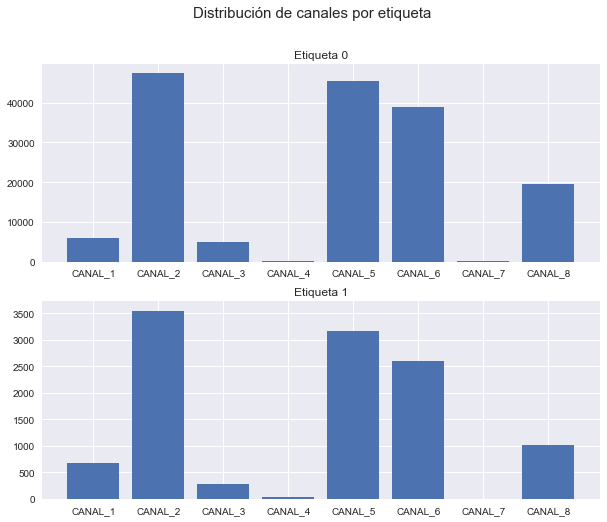

In [0]:
plt.style.use(["seaborn"])

fig, ax = plt.subplots(2)
fig.suptitle("Distribución de canales por etiqueta", fontsize = 15)

ax[0].bar(canales[canales.var_rpta == 0].canal, canales[canales.var_rpta == 0].conteo)
ax[0].set_title('Etiqueta 0')

ax[1].bar(canales[canales.var_rpta == 1].canal, canales[canales.var_rpta == 1].conteo)
ax[1].set_title('Etiqueta 1')

fig.set_figheight(8)
fig.set_figwidth(10)

In [0]:
# Identificador de las transacciones

tipo_trx = trx_prueba[["id", "var_rpta", "cdgtrn"]].drop_duplicates()
tipo_trx = tipo_trx.groupby(["var_rpta", "cdgtrn"]).size().to_frame(name = 'conteo').reset_index()
tipo_trx.cdgtrn = tipo_trx.cdgtrn.astype(str)
tipo_trx.head()

,var_rpta,cdgtrn,conteo
0,0,0,39408
1,0,1,122
2,0,2,5200
3,0,4,17
4,0,5,342


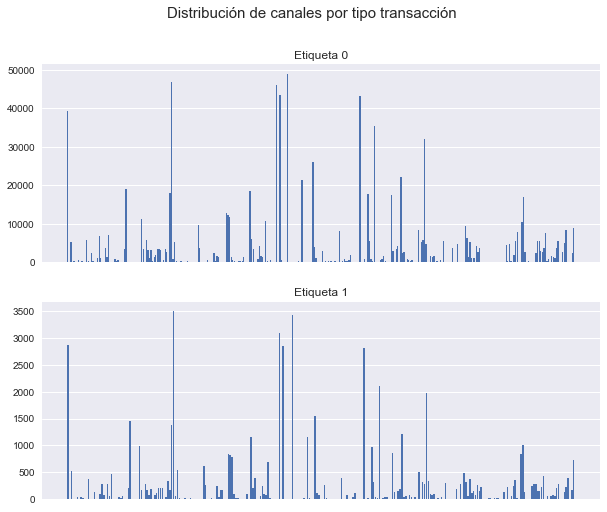

In [0]:
fig, ax = plt.subplots(2)
fig.suptitle("Distribución de canales por tipo transacción", fontsize = 15)

ax[0].bar(tipo_trx[tipo_trx.var_rpta == 0].cdgtrn, tipo_trx[tipo_trx.var_rpta == 0].conteo)
ax[0].set_title('Etiqueta 0')
ax[0].set_xticks([])

ax[1].bar(tipo_trx[tipo_trx.var_rpta == 1].cdgtrn, tipo_trx[tipo_trx.var_rpta == 1].conteo)
ax[1].set_title('Etiqueta 1')
ax[1].set_xticks([])

fig.set_figheight(8)
fig.set_figwidth(10)

In [0]:
# Observar si el valor de las transacciones tiene una relación con la etiqueta

from scipy import stats
stats.ttest_ind(trx_prueba[trx_prueba.var_rpta==0].vlrtran.values, 
                trx_prueba[trx_prueba.var_rpta==1].vlrtran.values,
                equal_var = False)

Ttest_indResult(statistic=3.568261847256698, pvalue=0.0003593624289234485)

Estadísticamente no podemos entonces decir que haya una diferencia significativa entre las medias y por lo tanto no sabemos si hay una relación importante entre la etiqueta y el valor de la transacción.

In [0]:
# Investigar acerca de la cantidad de sesiones por clientes

sesiones = trx_prueba[["id", "var_rpta", "sesion"]].drop_duplicates()
sesiones = sesiones.groupby(["id", "var_rpta"]).sesion.size().to_frame(name = 'conteo').reset_index()
sesiones.head()

,id,var_rpta,conteo
0,1,0,69
1,2,0,2
2,3,0,3
3,5,0,70
4,6,1,2


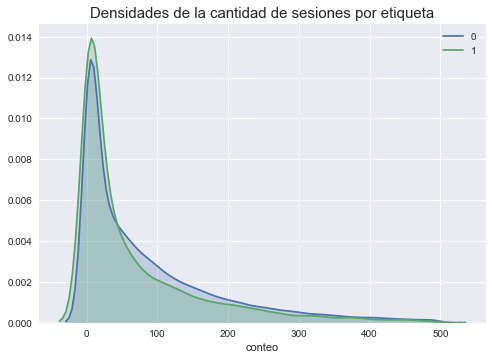

In [0]:
sns.distplot(sesiones[sesiones.var_rpta == 0].conteo, 
             hist = False, 
             kde_kws={'clip': (0, 500), 'shade': True}, 
             label = '0')
sns.distplot(sesiones[sesiones.var_rpta == 1].conteo, 
             hist = False, 
             kde_kws={'clip': (0, 500), 'shade': True}, 
             label = '1')
plt.title("Densidades de la cantidad de sesiones por etiqueta", fontsize = 15)
plt.legend()

In [0]:
stats.ttest_ind(sesiones[sesiones.var_rpta == 0].conteo, 
                sesiones[sesiones.var_rpta == 1].conteo,
                equal_var = False)

Ttest_indResult(statistic=5.706389093462077, pvalue=1.2157023369847353e-08)

In [0]:
datos_maestra[["cdgrpta", "descrip_cod_rpta", "clasif_cod_rpta"]].drop_duplicates().head()#.groupby("descrip_cod_rpta").size().sort_values(ascending = False)

,cdgrpta,descrip_cod_rpta,clasif_cod_rpta
0,None,None,None
1,0,Transaccion Exitosa,Exitosa
2,6,No Coinciden Datos,Tecnicamente Exitosa
3,299,#N/A Pendiente De Respuesta,No Exitosa
4,21,Bloqueado voluntariamente,Tecnicamente Exitosa


In [0]:
descripcion_maestra = datos_maestra[["cdgtrn", "clasif_trxn", "grupo_descrp_trxn", "descrip_trxn", "descripcion_grupo"]].drop_duplicates()#.groupby("descrip_cod_rpta").size().sort_values(ascending = False)
descripcion_maestra.head()

,cdgtrn,clasif_trxn,grupo_descrp_trxn,descrip_trxn,descripcion_grupo
0,None,None,None,None,None
1,349,No Financiera,Consulta Detalle Prestamos,Consulta Detalle Credito Hipotecario,Consultas / Movimientos / Extractos
2,227,No Financiera,Validacion Del Cliente Para Segunda Clave,Validacion Del Cliente Para Segunda Clave,Claves
3,260,No Financiera,Consulta De Saldo Tarjetas,Consulta saldos tarjetas propias Bancolombia,Consultas / Movimientos / Extractos
4,5500,No Financiera,Solicitud OTP ODA,Solicitud OTP ODA,Claves


In [0]:
descripcion_maestra.groupby("clasif_trxn").size()

clasif_trxn
Financiera        53
No Considerar      1
No Financiera    263
No considerar     50
None               1
dtype: int64

In [0]:
descripcion_maestra.groupby("descripcion_grupo").size().sort_values(ascending = False).head()

descripcion_grupo
Consultas / Movimientos / Extractos    101
Claves                                  72
No considerar                           23
Actualizaciones                         21
Transferencias de fondos                18
dtype: int64

In [0]:
clientes_valor_trx = trx_prueba[trx_prueba.vlrtran != 0].drop_duplicates()

In [0]:
clientes_0_trx = clientes_valor_trx[clientes_valor_trx.var_rpta == 0]
clientes_1_trx = clientes_valor_trx[clientes_valor_trx.var_rpta == 1]

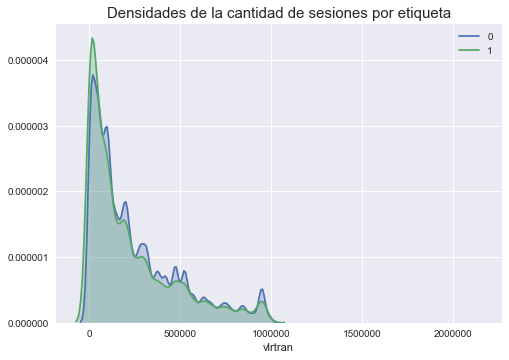

In [0]:
sns.distplot(clientes_0_trx.vlrtran, 
             hist = False, 
             kde_kws={'clip': (0, 10**6), 'shade': True}, 
             label = '0')

sns.distplot(clientes_1_trx.vlrtran, 
             hist = False, 
             kde_kws={'clip': (0, 10**6), 'shade': True}, 
             label = '1')

plt.title("Densidades de la cantidad de sesiones por etiqueta", fontsize = 15)
plt.legend()

In [0]:
stats.ttest_ind(clientes_0_trx.vlrtran, 
                clientes_1_trx.vlrtran,
                equal_var = False)

Ttest_indResult(statistic=3.961076185380011, pvalue=7.465209259467604e-05)

In [0]:
trx_prueba[["id", "canal", "disposit", "sesion"]].groupby(["id", "sesion"]).canal.size().head()

id  sesion
1   1         2
    2         4
    3         2
    4         4
    5         1
Name: canal, dtype: int64

# Sesiones por cliente bien contadas

In [0]:
trx_prueba["medio"] = trx_prueba["canal"] + trx_prueba["disposit"]

In [0]:
# Para predicción

#df_cliente_sesion = trx_prueba[["id", "medio", "sesion"]].groupby(["id", "medio"]).sesion.max().to_frame(name = 'conteo').reset_index()
#df_cliente_sesion.head()

,id,medio,conteo
0,1,CANAL_5DISPOSIT_4,69
1,2,CANAL_5DISPOSIT_4,2
2,3,CANAL_2DISPOSIT_10,2
3,3,CANAL_2DISPOSIT_11,2
4,3,CANAL_2DISPOSIT_4,0


In [0]:
# Para predicción

#sesiones_final = df_cliente_sesion.groupby(["id"]).conteo.sum().to_frame(name = 'nro_sesiones').reset_index()
#sesiones_final.head()

,id,nro_sesiones
0,76537,32
1,76538,423
2,76539,241
3,76540,20
4,76541,533


In [0]:
df_cliente_sesion = trx_prueba[["id", "medio", "sesion", "var_rpta"]].groupby(["id", "var_rpta", "medio"]).sesion.max().to_frame(name = 'conteo').reset_index()
df_cliente_sesion.head()

,id,var_rpta,medio,conteo
0,1,0,CANAL_5DISPOSIT_4,69
1,2,0,CANAL_5DISPOSIT_4,2
2,3,0,CANAL_2DISPOSIT_10,2
3,3,0,CANAL_2DISPOSIT_11,2
4,3,0,CANAL_2DISPOSIT_4,0


In [0]:
sesiones_final = df_cliente_sesion.groupby(["id", "var_rpta"]).conteo.sum().to_frame(name = 'nro_sesiones').reset_index()
sesiones_final.head()

,id,var_rpta,nro_sesiones
0,1,0,69
1,2,0,2
2,3,0,6
3,4,0,619
4,5,0,120


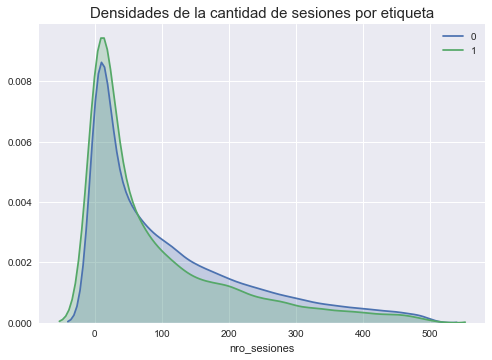

In [0]:
sns.distplot(sesiones_final[sesiones_final.var_rpta == 0].nro_sesiones, 
             hist = False, 
             kde_kws={'clip': (0, 500), 'shade': True},  
             
             label = '0')
sns.distplot(sesiones_final[sesiones_final.var_rpta == 1].nro_sesiones, 
             hist = False, 
             kde_kws={'clip': (0, 500), 'shade': True}, 
             label = '1')
plt.title("Densidades de la cantidad de sesiones por etiqueta", fontsize = 15)
plt.legend()

# Rango de tiempo

In [0]:
# Para predicción

#fechas = trx_prueba.groupby(["id"]).fecha_trxn.agg(["max", "min"]).reset_index()
#fechas["max"] = pd.to_datetime(fechas["max"])
#fechas["min"] = pd.to_datetime(fechas["min"])
#fechas.head()

,id,max,min
0,1,2018-02-20 14:16:00.211800,2017-03-03 08:49:00.033200
1,2,2015-11-01 09:50:00.026800,2015-11-01 09:48:00.027600
2,3,2016-05-04 10:09:00.201500,2016-01-18 19:35:00.297600
3,4,2017-05-29 10:53:00.335300,2016-06-02 12:58:00.423700
4,5,2017-02-27 20:02:00.165100,2016-03-14 18:37:00.167900


In [0]:
fechas = trx_prueba.groupby(["id", "var_rpta"]).fecha_trxn.agg(["max", "min"]).reset_index()
fechas["max"] = pd.to_datetime(fechas["max"])
fechas["min"] = pd.to_datetime(fechas["min"])
fechas.head()

,id,var_rpta,max,min
0,1,0,2018-02-20 14:16:00.211800,2017-03-03 08:49:00.033200
1,2,0,2015-11-01 09:50:00.026800,2015-11-01 09:48:00.027600
2,3,0,2016-05-04 10:09:00.201500,2016-01-18 19:35:00.297600
3,4,0,2017-05-29 10:53:00.335300,2016-06-02 12:58:00.423700
4,5,0,2017-02-27 20:02:00.165100,2016-03-14 18:37:00.167900


In [0]:
def convertir_a_dias(object):
    return object.days/365

In [0]:
fechas["diff"] = (fechas["max"] - fechas["min"]).map(convertir_a_dias)
fechas.head()

,id,var_rpta,max,min,diff
0,1,0,2018-02-20 14:16:00.211800,2017-03-03 08:49:00.033200,0.969863
1,2,0,2015-11-01 09:50:00.026800,2015-11-01 09:48:00.027600,0.000000
2,3,0,2016-05-04 10:09:00.201500,2016-01-18 19:35:00.297600,0.290411
3,4,0,2017-05-29 10:53:00.335300,2016-06-02 12:58:00.423700,0.986301
4,5,0,2017-02-27 20:02:00.165100,2016-03-14 18:37:00.167900,0.958904


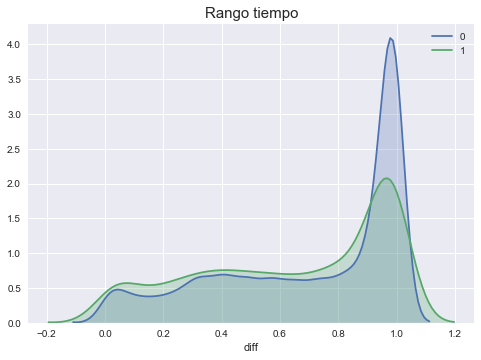

In [0]:
sns.distplot(fechas[fechas.var_rpta == 0]["diff"], 
             hist = False, 
             kde_kws={'clip': (0, 500), 'shade': True}, 
             label = '0')
sns.distplot(fechas[fechas.var_rpta == 1]["diff"], 
             hist = False, 
             kde_kws={'clip': (0, 500), 'shade': True}, 
             label = '1')
plt.title("Rango tiempo", fontsize = 15)
plt.legend()

# Incluir descripciones de código y trxn

In [0]:
trx_prueba["id"] = trx_prueba["id"].astype(str)
trx_prueba["cdgtrn"] = trx_prueba["cdgtrn"].astype(str)
trx_prueba["cdgrpta"] = trx_prueba["cdgrpta"].astype(str)

datos_maestra["cdgtrn"] = datos_maestra["cdgtrn"].astype(str)
datos_maestra["cdgrpta"] = datos_maestra["cdgrpta"].astype(str)

In [0]:
trx_prueba_maestra = trx_prueba.merge(datos_maestra, how = 'left', on = ['canal', 'disposit', 'cdgtrn', 'cdgrpta'])
trx_prueba_maestra.head(10)

,id,fecha_trxn,canal,disposit,cdgtrn,cdgrpta,vlrtran,sesion,f_analisis,var_rpta,...,medio,grupo_descrp_trxn,descrip_trxn,clasif_trxn,descripcion_grupo,descrip_cod_rpta,clasif_cod_rpta,grupo_modifcado,culpa_banco,producto_asociado
0,50578,2016-02-27 11:18:00.465900,CANAL_5,DISPOSIT_4,369,0,0.0,94,201605,0,...,CANAL_5DISPOSIT_4,Logueo Para Transacciones,Logueo Para Transacciones,No Financiera,Autenticacion,Transaccion Exitosa,Exitosa,Autenticaciones,NaN,Sin producto
1,50578,2016-02-26 14:25:00.165800,CANAL_5,DISPOSIT_4,356,0,0.0,93,201605,0,...,CANAL_5DISPOSIT_4,Consulta De Saldo Deposito,Consulta De Saldos Consolidados,No Financiera,Consultas / Movimientos / Extractos,Transaccion Exitosa,Exitosa,Consultas / Movimientos / Extractos,NaN,Tarjeta Debito
2,50578,2016-02-26 14:25:00.058900,CANAL_5,DISPOSIT_4,369,0,0.0,93,201605,0,...,CANAL_5DISPOSIT_4,Logueo Para Transacciones,Logueo Para Transacciones,No Financiera,Autenticacion,Transaccion Exitosa,Exitosa,Autenticaciones,NaN,Sin producto
3,50578,2016-02-25 14:08:00.471500,CANAL_5,DISPOSIT_4,604,599,0.0,92,201605,0,...,CANAL_5DISPOSIT_4,Validacion De Segunda Clave,Validacion De Segunda Clave,No considerar,No considerar,Segunda Clave Bloqueada Por Seguridad Bancaria,No considerar,NaN,NO,Sin producto
4,50578,2016-02-25 14:08:00.364800,CANAL_5,DISPOSIT_4,604,599,0.0,92,201605,0,...,CANAL_5DISPOSIT_4,Validacion De Segunda Clave,Validacion De Segunda Clave,No considerar,No considerar,Segunda Clave Bloqueada Por Seguridad Bancaria,No considerar,NaN,NO,Sin producto
5,50578,2016-02-25 14:08:00.220600,CANAL_5,DISPOSIT_4,356,0,0.0,92,201605,0,...,CANAL_5DISPOSIT_4,Consulta De Saldo Deposito,Consulta De Saldos Consolidados,No Financiera,Consultas / Movimientos / Extractos,Transaccion Exitosa,Exitosa,Consultas / Movimientos / Extractos,NaN,Tarjeta Debito
6,50578,2016-02-25 14:08:00.147900,CANAL_5,DISPOSIT_4,369,0,0.0,92,201605,0,...,CANAL_5DISPOSIT_4,Logueo Para Transacciones,Logueo Para Transacciones,No Financiera,Autenticacion,Transaccion Exitosa,Exitosa,Autenticaciones,NaN,Sin producto
7,50578,2016-02-24 14:57:00.045300,CANAL_5,DISPOSIT_4,464,0,0.0,91,201605,0,...,CANAL_5DISPOSIT_4,Consulta De Movimientos Deposito,Consulta Movimientos Cuentas Deposito,No Financiera,Consultas / Movimientos / Extractos,Transaccion Exitosa,Exitosa,Consultas / Movimientos / Extractos,NaN,Tarjeta Debito
8,50578,2016-02-24 14:57:00.044500,CANAL_5,DISPOSIT_4,360,0,0.0,91,201605,0,...,CANAL_5DISPOSIT_4,Consulta De Saldo Deposito,Consulta De Saldos De Cuentas En Tiempo Real,No considerar,No considerar,Transaccion Exitosa,No considerar,NaN,NO,Sin producto
9,50578,2016-02-24 14:57:00.040600,CANAL_5,DISPOSIT_4,491,0,0.0,91,201605,0,...,CANAL_5DISPOSIT_4,Consulta Cuentas Inscritas Banco,Consulta Cuentas Inscritas Banco,No considerar,No considerar,Transaccion Exitosa,Exitosa,NaN,NaN,Sin producto


In [0]:
#Para predicción

conteo_cliente = trx_prueba_maestra.groupby(["id"]).agg({
                                      "canal": 'nunique', 
                                      "disposit": 'nunique',
                                      "medio" : 'nunique',
                                      "grupo_modifcado": 'nunique',
                                      "producto_asociado" : 'nunique'}).reset_index()

In [0]:
conteo_cliente = trx_prueba_maestra.groupby(["id", "var_rpta"]).agg({
                                      "canal": 'nunique', 
                                      "disposit": 'nunique',
                                      "medio" : 'nunique',
                                      "grupo_modifcado": 'nunique',
                                      "producto_asociado" : 'nunique'}).reset_index()

In [0]:
conteo_cliente.head()

In [0]:
lista_medias = []
for columna in conteo_cliente.columns[2:]:
    tipo_0 = conteo_cliente[conteo_cliente.var_rpta == 0][columna].mean()
    tipo_1 = conteo_cliente[conteo_cliente.var_rpta == 1][columna].mean()
    lista_medias.append(np.array([tipo_0, tipo_1]))

In [0]:
data = dict(zip(["#_" + canal for canal in conteo_cliente.columns[2:]], lista_medias))
df_medias = pd.DataFrame(data = data)
df_medias

,#_canal,#_disposit,#_medio,#_grupo_modifcado,#_producto_asociado
0,2.688409,3.492975,4.098512,5.625120,4.062577
1,2.408685,3.209877,3.730736,4.849085,3.512346


# Información financiera

In [0]:
# Para predicción

tabla_financiera = trx_prueba_maestra[["id", "clasif_trxn", "vlrtran"]].drop_duplicates()

In [0]:
# Para predicción

tabla_financiera = tabla_financiera.groupby(["id"]).agg({'clasif_trxn': 'max',
                                                                     'vlrtran': 'max'}).reset_index()
tabla_financiera.head()

,id,clasif_trxn,vlrtran
0,100000,1,121600.0
1,100001,0,0.0
2,100002,1,210000.0
3,100003,0,0.0
4,100004,1,5250000.0


In [0]:
#del trx_prueba

tabla_financiera = trx_prueba_maestra[["id", "var_rpta", "clasif_trxn", "vlrtran"]].drop_duplicates()

In [0]:
tabla_financiera["clasif_trxn"] = np.where(tabla_financiera["clasif_trxn"] == 'No Financiera', 0, 
                                          np.where(tabla_financiera["clasif_trxn"] == 'Financiera', 1, 0))

In [0]:
tabla_financiera = tabla_financiera.groupby(["id", "var_rpta"]).agg({'clasif_trxn': 'max',
                                                                     'vlrtran': 'max'}).reset_index()
tabla_financiera.head()

,id,var_rpta,clasif_trxn,vlrtran
0,1,0,0,0.0
1,10,0,1,1627500.0
2,100,0,0,0.0
3,1000,0,0,0.0
4,10000,0,0,0.0


# Construcción de la ABT

In [0]:
base = trx_prueba_maestra[["id"]].drop_duplicates()

sesiones_final["id"] = sesiones_final["id"].astype(str)
fechas["id"] = fechas["id"].astype(str)
conteo_cliente["id"] = conteo_cliente['id'].astype(str)
tabla_financiera["id"] = tabla_financiera["id"].astype(str)
datos_etiqueta["id"] = datos_etiqueta["id"].astype(str)

base = base.merge(sesiones_final, how = 'left', on = ['id'])
base = base.merge(fechas[["id", "diff"]], how = 'left', on = ['id'])
base = base.merge(conteo_cliente[["id", "grupo_modifcado", "producto_asociado"]], how = 'left', on = ['id'])
base = base.merge(tabla_financiera[["id", "clasif_trxn", "vlrtran"]], how = 'left', on = ['id'])
base = base.merge(datos_etiqueta[["id", "segmento"]], how = 'left', on = ['id'])

In [0]:
#Intento 

base["nro_sesiones"] = np.where(base["nro_sesiones"] >= 100, 100, base["nro_sesiones"])

In [0]:
base.head()

,id,var_rpta,nro_sesiones,diff,grupo_modifcado,producto_asociado,clasif_trxn,vlrtran,segmento
0,50578,0,100,0.657534,12,8,1,9450000.0,4
1,50579,0,100,0.991781,10,9,1,1039500.0,5
2,50580,0,100,0.506849,9,6,1,0.0,0
3,50581,0,100,0.797260,7,5,0,0.0,1
4,50582,0,100,0.739726,2,3,0,0.0,5


# Modelos

In [0]:
#columnas_entrenamiento = ['nro_sesiones', 
#                          'diff', 
#                          'grupo_modifcado', 
#                          'producto_asociado', 
#                          'clasif_trxn', 
#                          'vlrtran', 
#                          'segmento']

columnas_entrenamiento = ['nro_sesiones',
                          'diff', 
                          'grupo_modifcado',
                          'producto_asociado', 
                          'clasif_trxn', 
                          'vlrtran', 
                          'segmento']

X = base.loc[:, columnas_entrenamiento]
Y = base["var_rpta"]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

# Logística

In [0]:
modelo = LogisticRegression(random_state = 0, solver = 'newton-cg')

In [0]:
modelo.fit(X_entr, Y_entr)

Y_pred = modelo.predict_proba(X_test)

0.6134573497414111

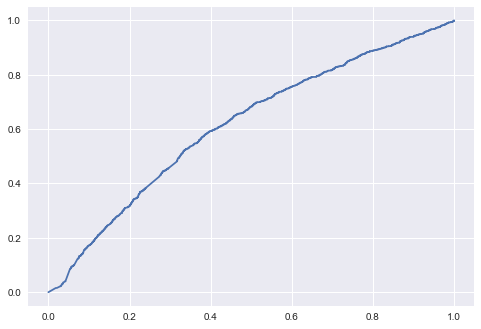

In [0]:
fpr, tpr, thresholds  = roc_curve(np.array(Y_test), np.array([x[1] for x in np.array(Y_pred)]))

plt.plot(fpr, tpr)

roc_auc_score(np.array(Y_test), np.array([x[1] for x in np.array(Y_pred)]))

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
modelo_1 = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [0]:
modelo_1.fit(X_entr, Y_entr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
Y_1_pred = modelo_1.predict_proba(X_test)

Text(0.5, 1.0, 'AUC: 0.6369571844745765')

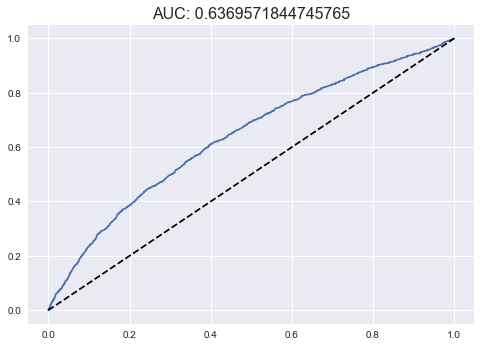

In [0]:
fpr, tpr, thresholds  = roc_curve(np.array(Y_test), np.array([x[1] for x in np.array(Y_1_pred)]))
score_auc = roc_auc_score(np.array(Y_test), np.array([x[1] for x in np.array(Y_1_pred)]))

plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), '--', color = 'black')
plt.title("AUC: {}".format(score_auc), fontsize = 16)

# Red neuronal

In [0]:
def evaluar_modelo(capa_oculta, neuronas):
    X_entr, X_test, Y_entr, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

    scalar = StandardScaler()
    X_entr = scalar.fit_transform(X_entr)
    X_test = scalar.fit_transform(X_test)
    
    neural = MLPClassifier(solver='lbfgs', 
                       alpha=1e-5, 
                       hidden_layer_sizes = (capa_oculta, neuronas), 
                       random_state = 1, 
                       activation = 'relu',
                        )
    modelo_2 = neural.fit(X_entr, Y_entr)
    Y_2_pred = modelo_2.predict_proba(X_test)
    score_auc = roc_auc_score(np.array(Y_test), np.array([x[1] for x in np.array(Y_2_pred)]))

    return score_auc

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [0]:
X_entr, X_test, Y_entr, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_entr = scalar.fit_transform(X_entr)
X_test = scalar.fit_transform(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
neural = MLPClassifier(solver='lbfgs', 
                       alpha=1e-5, 
                       hidden_layer_sizes = (11, 100), 
                       activation = 'relu',
                       max_iter = 500
                        )

In [0]:
modelo_2 = neural.fit(X_entr, Y_entr)

In [0]:
Y_2_pred = modelo_2.predict_proba(X_test)

In [0]:
fpr, tpr, thresholds  = roc_curve(np.array(Y_test), np.array([x[1] for x in np.array(Y_2_pred)]))
score_auc = roc_auc_score(np.array(Y_test), np.array([x[1] for x in np.array(Y_2_pred)]))

plt.style.use(["seaborn"])
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), '--', color = 'black')
plt.title("Red neuronal, AUC: {}".format(score_auc), fontsize = 16)

texto en cursiva# Predicción

In [0]:
columnas_entrenamiento = ['nro_sesiones',
                          'diff', 
                          'grupo_modifcado',
                          'producto_asociado', 
                          'clasif_trxn', 
                          'vlrtran', 
                          'segmento']

X = base.loc[:, columnas_entrenamiento]

scalar = StandardScaler()
X_pred = scalar.fit_transform(X)

In [0]:
X_pred

array([[-0.53836651, -1.08880546, -0.46536453, ..., -0.90194926,
        -0.03846129,  0.80404152],
       [ 1.25341778,  0.95495523,  0.42659624, ...,  1.10870982,
        -0.03788911,  0.80404152],
       [ 0.41939031,  0.58999797, -0.76268479, ..., -0.90194926,
        -0.03202453,  0.80404152],
       ...,
       [ 0.8730646 ,  1.0133484 ,  1.02123675, ...,  1.10870982,
        -0.03774607,  0.80404152],
       [ 0.02528942,  0.10095523,  1.02123675, ...,  1.10870982,
        -0.03768706,  0.80404152],
       [-0.65751329, -0.75304478, -0.76268479, ..., -0.90194926,
        -0.03846129,  0.29155918]])

In [0]:
Y_pred = modelo_2.predict_proba(X_pred)

In [0]:
Y_pred

array([[0.89386563, 0.10613437],
       [0.95181357, 0.04818643],
       [0.90223237, 0.09776763],
       ...,
       [0.96947721, 0.03052279],
       [0.92872245, 0.07127755],
       [0.98145258, 0.01854742]])

In [0]:
tabla_final = pd.DataFrame()
tabla_final["id"] = base["id"]
tabla_final["pred"] = np.array([x[1] for x in Y_pred])

In [0]:
tabla_final.to_csv('D:\\Datos\\Dataton\\archivo_kaggle.csv', sep = ',', header = True, index = False)

## **Creación de función para datos de entrenamiento y datos de predicción**

In [0]:
def creacion_tabla(tipo):
  '''Creación de función condensada para
     el set de entrenamiento y de prueba'''

  if tipo == 'entr':

    # Carga de los datos
    ruta = 'D:\\Datos\\Dataton\\'

    archivo_etiquetas = 'DT19_Datos_Var_Rpta_train.csv'
    archivo_datos = 'DT19_Datos_transaccionales_train.csv'
    archivo_maestra = 'DT19_maestro_cdgtrn_cdgrpta.csv'

    datos_etiqueta = pd.read_csv(ruta + archivo_etiquetas).drop_duplicates()
    datos = pd.read_csv(ruta + archivo_datos).drop_duplicates()
    datos_maestra = pd.read_csv(ruta + archivo_maestra, sep = ';').drop_duplicates()

    # Pegar las etiquetas a los datos transaccionales
    trx_prueba = datos.merge(datos_etiqueta, how = 'inner', on = ['id'])
    del datos

    # Conteo correcto de sesiones
    trx_prueba["medio"] = trx_prueba["canal"] + trx_prueba["disposit"]
    df_cliente_sesion = trx_prueba[["id", "medio", "sesion", "var_rpta"]].groupby(["id", "var_rpta", "medio"]).sesion.max().to_frame(name = 'conteo').reset_index()
    sesiones_final = df_cliente_sesion.groupby(["id", "var_rpta"]).conteo.sum().to_frame(name = 'nro_sesiones').reset_index()

    # Creación del rango de las fechas (diff)
    fechas = trx_prueba.groupby(["id", "var_rpta"]).fecha_trxn.agg(["max", "min"]).reset_index()
    fechas["max"] = pd.to_datetime(fechas["max"])
    fechas["min"] = pd.to_datetime(fechas["min"])
    fechas["diff"] = (fechas["max"] - fechas["min"]).map(lambda x: (x.days)/365)
    
    # Código y transacción
    trx_prueba["id"] = trx_prueba["id"].astype(str)
    trx_prueba["cdgtrn"] = trx_prueba["cdgtrn"].astype(str)
    trx_prueba["cdgrpta"] = trx_prueba["cdgrpta"].astype(str)

    datos_maestra["cdgtrn"] = datos_maestra["cdgtrn"].astype(str)
    datos_maestra["cdgrpta"] = datos_maestra["cdgrpta"].astype(str)

    trx_prueba_maestra = trx_prueba.merge(datos_maestra, how = 'left', on = ['canal', 'disposit', 'cdgtrn', 'cdgrpta'])

    conteo_cliente = trx_prueba_maestra.groupby(["id", "var_rpta"]).agg({
                                      "canal": 'nunique', 
                                      "disposit": 'nunique',
                                      "medio" : 'nunique',
                                      "grupo_modifcado": 'nunique',
                                      "producto_asociado" : 'nunique'}).reset_index()

    # Tabla con datos financieros
    tabla_financiera = trx_prueba_maestra[["id", "clasif_trxn", "vlrtran"]].drop_duplicates()
    tabla_financiera["clasif_trxn"] = np.where(tabla_financiera["clasif_trxn"] == 'No Financiera', 0, 
                                          np.where(tabla_financiera["clasif_trxn"] == 'Financiera', 1, 0))
    
    tabla_financiera = tabla_financiera.groupby(["id", "var_rpta"]).agg({'clasif_trxn': 'max',
                                                                     'vlrtran': 'max'}).reset_index()

    # Creación de la variable de brecha



    ###################################

    # Creación de la ABT
    base = trx_prueba_maestra[["id"]].drop_duplicates()

    sesiones_final["id"] = sesiones_final["id"].astype(str)
    fechas["id"] = fechas["id"].astype(str)
    conteo_cliente["id"] = conteo_cliente['id'].astype(str)
    tabla_financiera["id"] = tabla_financiera["id"].astype(str)
    datos_etiqueta["id"] = datos_etiqueta["id"].astype(str)

    base = base.merge(sesiones_final, how = 'left', on = ['id'])
    base = base.merge(fechas[["id", "diff"]], how = 'left', on = ['id'])
    base = base.merge(conteo_cliente[["id", "grupo_modifcado", "producto_asociado"]], how = 'left', on = ['id'])
    base = base.merge(tabla_financiera[["id", "clasif_trxn", "vlrtran"]], how = 'left', on = ['id'])
    base = base.merge(datos_etiqueta[["id", "segmento"]], how = 'left', on = ['id'])

    del trx_prueba_maestra
    del trx_prueba

    return base

  else:
    
    archivo_etiquetas = 'DT19_Datos_Var_Rpta_predict.csv'
    archivo_datos = 'DT19_Datos_transaccionales_predict.csv'
    archivo_maestra = 'DT19_maestro_cdgtrn_cdgrpta.csv'

    datos_etiqueta = pd.read_csv(ruta + archivo_etiquetas).drop_duplicates()
    trx_prueba = pd.read_csv(ruta + archivo_datos).drop_duplicates()
    datos_maestra = pd.read_csv(ruta + archivo_maestra, sep = ';').drop_duplicates()

    # Conteo correcto de sesiones
    trx_prueba["medio"] = trx_prueba["canal"] + trx_prueba["disposit"]
    df_cliente_sesion = trx_prueba[["id", "medio", "sesion"]].groupby(["id", "var_rpta", "medio"]).sesion.max().to_frame(name = 'conteo').reset_index()
    sesiones_final = df_cliente_sesion.groupby(["id"]).conteo.sum().to_frame(name = 'nro_sesiones').reset_index()

    # Creación del rango de las fechas (diff)
    fechas = trx_prueba.groupby(["id"]).fecha_trxn.agg(["max", "min"]).reset_index()
    fechas["max"] = pd.to_datetime(fechas["max"])
    fechas["min"] = pd.to_datetime(fechas["min"])
    fechas["diff"] = (fechas["max"] - fechas["min"]).map(lambda x: (x.days)/365)
    
    # Código y transacción
    trx_prueba["id"] = trx_prueba["id"].astype(str)
    trx_prueba["cdgtrn"] = trx_prueba["cdgtrn"].astype(str)
    trx_prueba["cdgrpta"] = trx_prueba["cdgrpta"].astype(str)

    datos_maestra["cdgtrn"] = datos_maestra["cdgtrn"].astype(str)
    datos_maestra["cdgrpta"] = datos_maestra["cdgrpta"].astype(str)

    trx_prueba_maestra = trx_prueba.merge(datos_maestra, how = 'left', on = ['canal', 'disposit', 'cdgtrn', 'cdgrpta'])

    conteo_cliente = trx_prueba_maestra.groupby(["id"]).agg({
                                      "canal": 'nunique', 
                                      "disposit": 'nunique',
                                      "medio" : 'nunique',
                                      "grupo_modifcado": 'nunique',
                                      "producto_asociado" : 'nunique'}).reset_index()

    # Tabla con datos financieros
    tabla_financiera = trx_prueba_maestra[["id", "clasif_trxn"]].drop_duplicates()
    tabla_financiera["clasif_trxn"] = np.where(tabla_financiera["clasif_trxn"] == 'No Financiera', 0, 
                                          np.where(tabla_financiera["clasif_trxn"] == 'Financiera', 1, 0))
    
    tabla_financiera = tabla_financiera.groupby(["id"]).agg({'clasif_trxn': 'max',
                                                                     'vlrtran': 'max'}).reset_index()

    # Creación de la variable de brecha



    ###################################

    # Creación de la ABT
    base = trx_prueba_maestra[["id"]].drop_duplicates()

    sesiones_final["id"] = sesiones_final["id"].astype(str)
    fechas["id"] = fechas["id"].astype(str)
    conteo_cliente["id"] = conteo_cliente['id'].astype(str)
    tabla_financiera["id"] = tabla_financiera["id"].astype(str)
    datos_etiqueta["id"] = datos_etiqueta["id"].astype(str)

    base = base.merge(sesiones_final, how = 'left', on = ['id'])
    base = base.merge(fechas[["id", "diff"]], how = 'left', on = ['id'])
    base = base.merge(conteo_cliente[["id", "grupo_modifcado", "producto_asociado"]], how = 'left', on = ['id'])
    base = base.merge(tabla_financiera[["id", "clasif_trxn", "vlrtran"]], how = 'left', on = ['id'])
    base = base.merge(datos_etiqueta[["id", "segmento"]], how = 'left', on = ['id'])

    del trx_prueba_maestra
    del trx_prueba

    return base
